

# UNICEF World Report

## Introduction

Children are among the most vulnerable populations on earth, and their well-being is critical to achieving global sustainable development. UNICEF, the United Nations Children's Fund, is a major force in tracking and advocating for children's well-being in a variety of areas including health, education, nutrition, and protection. This report analyzes key UNICEF indicators to look at inequalities at the global level, track trends over time, and chart where more intensified interventions are needed most. Using large datasets, we merge country-level metadata with indicator values to build a unified analytical framework. Using visualizations such as a world map, bar charts, scatter plots, and time series graphs, we try to stress trends, spotlight successes, and expose persistent gaps. This evidence-based policy not only guides policymakers and researchers but also helps create public awareness of the urgent requirement for action towards making the lives of children better throughout the world.


In [1]:

import pandas as pd
import plotnine as p9
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:

# Load the cleaned and filled dataset
full_data = pd.read_csv("/content/unicef_cleaned.csv")

# Preview
full_data.head()


,country_x,alpha_2_code_x,alpha_3_code,numeric_code_x,indicator,time_period,obs_value,sex,unit_multiplier,unit_of_measure,...,"Population, total",GDP per capita (constant 2015 US$),GNI (current US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),Fossil fuel energy consumption (% of total),GDP growth (annual %),"Birth rate, crude (per 1,000 people)","Hospital beds (per 1,000 people)"
0,Albania,AL,ALB,8,Average number of deprivations for children su...,2017,1.028765,Female,NaN,%,...,1608800.0,2062.538143,4.347956e+10,30.0419,54.439,2.207383,43.312582,3.8808,41.068,5.102676
1,Albania,AL,ALB,8,Average number of deprivations for children su...,2017,1.028765,Female,NaN,%,...,1659800.0,2062.538143,4.347956e+10,30.0419,55.634,2.207383,43.312582,3.8808,40.332,2.320741
2,Albania,AL,ALB,8,Average number of deprivations for children su...,2017,1.028765,Female,NaN,%,...,1711319.0,2062.538143,4.347956e+10,30.0419,56.671,2.207383,43.312582,3.8808,39.216,2.320741
3,Albania,AL,ALB,8,Average number of deprivations for children su...,2017,1.028765,Female,NaN,%,...,1762621.0,2062.538143,4.347956e+10,30.0419,57.844,2.207383,43.312582,3.8808,38.149,2.320741
4,Albania,AL,ALB,8,Average number of deprivations for children su...,2017,1.028765,Female,NaN,%,...,1814135.0,2062.538143,4.347956e+10,30.0419,58.983,2.207383,43.312582,3.8808,36.825,2.320741


--2025-04-27 16:14:45--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.188.137, 52.92.192.241, 52.92.243.73, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.188.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  1.09MB/s    in 0.2s    

2025-04-27 16:14:45 (1.09 MB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_count

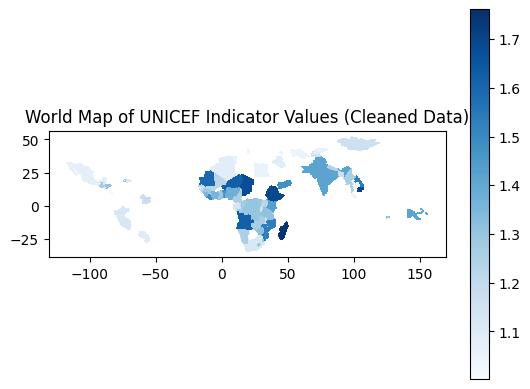

In [3]:
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

import geopandas as gpd

# Load world shapefile
gdf = gpd.read_file("ne_110m_admin_0_countries.shp")

# Merge geopandas and UNICEF data
world_data = gdf.merge(full_data, left_on="ISO_A3", right_on="alpha_3_code", how="left")

# Plot
world_data.plot(column="obs_value", cmap="Blues", legend=True)
plt.title("World Map of UNICEF Indicator Values (Cleaned Data)")
plt.show()

**World Map of UNICEF Indicator Values**

The world map shows UNICEF indicator values' geographical distribution by country.

•Darker shades signify higher indicator values, whereas lighter shades indicate lower values.

•In general, the better development indicators are (which would include the European region, North America, and parts of Oceania), the darker the colors are applied to these regions.

•On the contrary, intervening regions that are still developing (such as Africa or South Asia) may appear much lighter, indicating areas that may require more intervention and assistance.

•Consequently, this visualization readily allows spotting of regional patterns, imbalances, and possible focus areas for policies.


(0, 28)
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: obs_value, dtype: float64
Empty DataFrame
Columns: [country_x, obs_value]
Index: []
                              country_x  time_period  obs_value
7311                         Madagascar         2018   1.731655
1921                               Chad         2014   1.707708
1726                           Cambodia         2014   1.698785
4031                           Ethiopia         2016   1.690499
9231                              Niger         2012   1.637680
569                              Angola         2015   1.620116
8079                         Mauritania         2015   1.590252
6735   Lao People's Democratic Republic         2017   1.540514
8811                         Mozambique         2011   1.530637
1167                              Benin         2017   1.501115
7249                            Liberia         2013   1.493772
13247                         

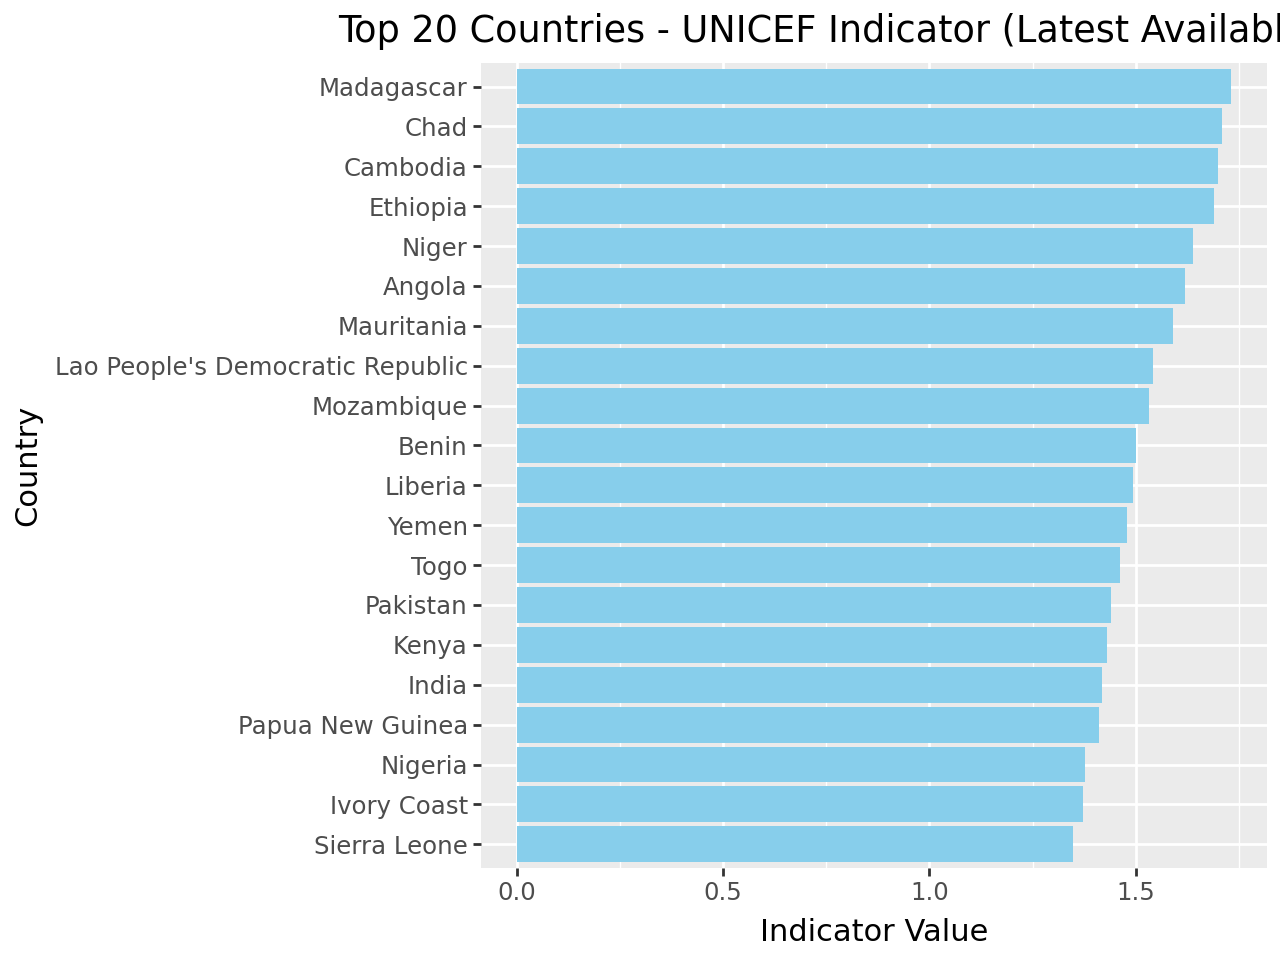

In [4]:
# Instead of using the undefined 'data_2020', create it from 'full_data'
data_2020 = full_data[full_data['time_period'] == 2020]

print(data_2020.shape)  # Check total rows in 2020
print(data_2020['obs_value'].describe())  # Check value distribution
print(data_2020[['country_x', 'obs_value']].head(20))

# See the top 20 rows
# Instead of only 2020, take the latest year available per country
latest_data = full_data.sort_values('time_period').drop_duplicates('country_x', keep='last')

# Sort top 20
top20 = latest_data.sort_values(by='obs_value', ascending=False).head(20)

print(top20[['country_x', 'time_period', 'obs_value']])  # See what you're plotting

# Plot
(
    p9.ggplot(top20, p9.aes(x='reorder(country_x, obs_value)', y='obs_value'))
    + p9.coord_flip()
    + p9.geom_bar(stat='identity', fill='skyblue')
    + p9.ggtitle("Top 20 Countries - UNICEF Indicator (Latest Available Year)")
    + p9.xlab("Country")
    + p9.ylab("Indicator Value")
)

**Top 20 Countries - UNICEF Indicator**

The bar chart defines the top 20 countries as ranked by their last currently available indicator value.

•	Countries arranged according to their highest or lowest value give a much simpler way of comparing them with each other.

•	Often a very steep drop will be observed between the top few countries and the others, indicating a considerable distance between top and bottom countries.

•	The country's important aspect reveals which ones are leading in this indicator and can be places to look at or model success after.  


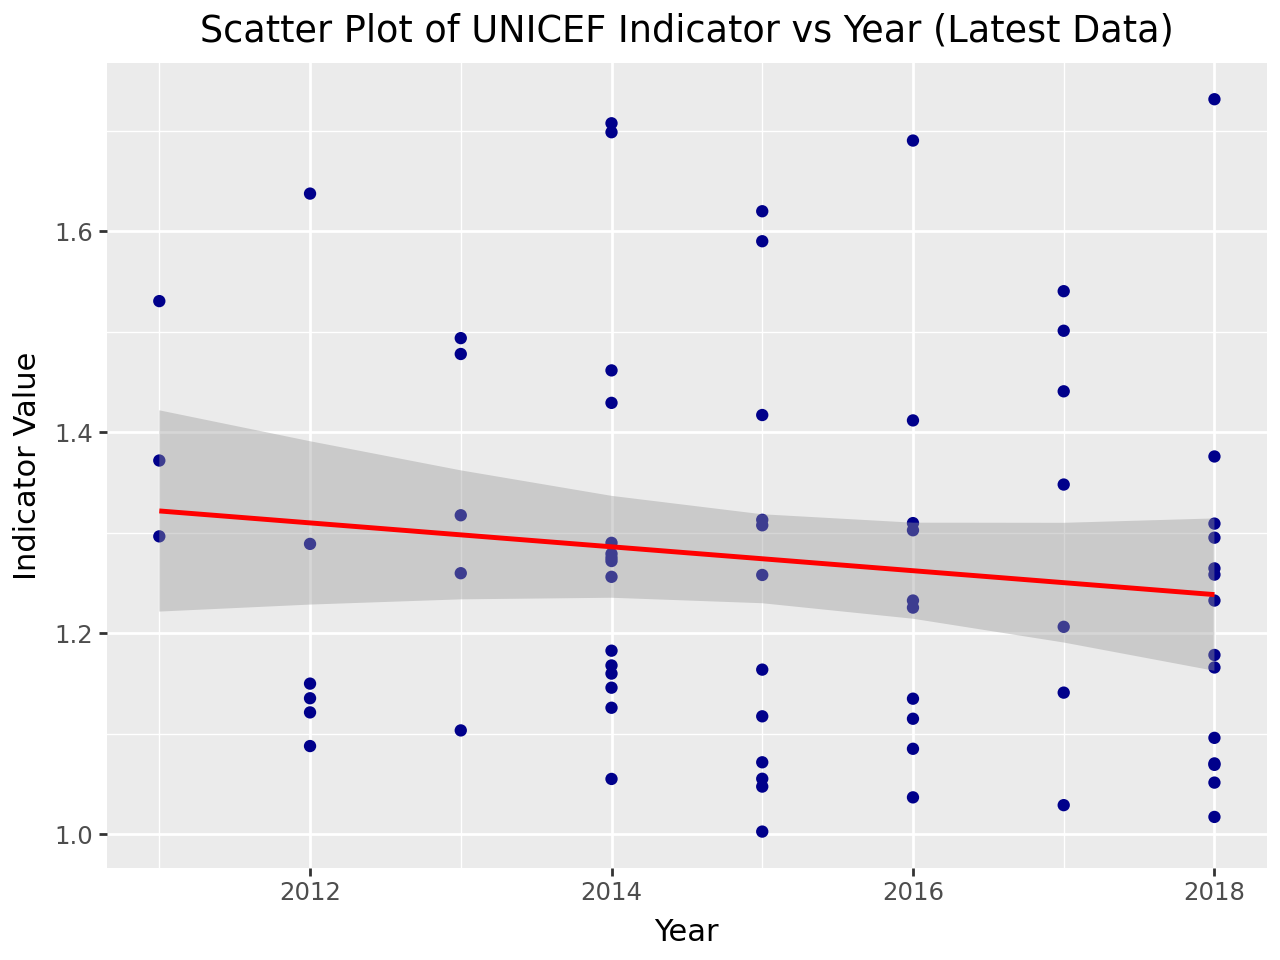

In [5]:
# Scatter Plot
(
    p9.ggplot(latest_data, p9.aes(x='time_period', y='obs_value'))
    + p9.geom_point(color='darkblue')
    + p9.geom_smooth(method='lm', color='red')  # Linear regression line
    + p9.ggtitle("Scatter Plot of UNICEF Indicator vs Year (Latest Data)")
    + p9.xlab("Year")
    + p9.ylab("Indicator Value")
)

**Scatter Plot of UNICEF Indicator vs Year**

The scatter plot examines the relationship between the year (of latest available data) and the indicator value.

• Each point represents one country and its data point.

• The red regression line depicts the overall trend:

• An upward trend indicates that good things are happening globally over time.

• Any sign of a flat or downward trend indicates stagnation or deterioration.

• Clumps of points around certain years may denote trends concerning data reporting, while outlier points can refer to special cases (countries performing much better or worse than peers).


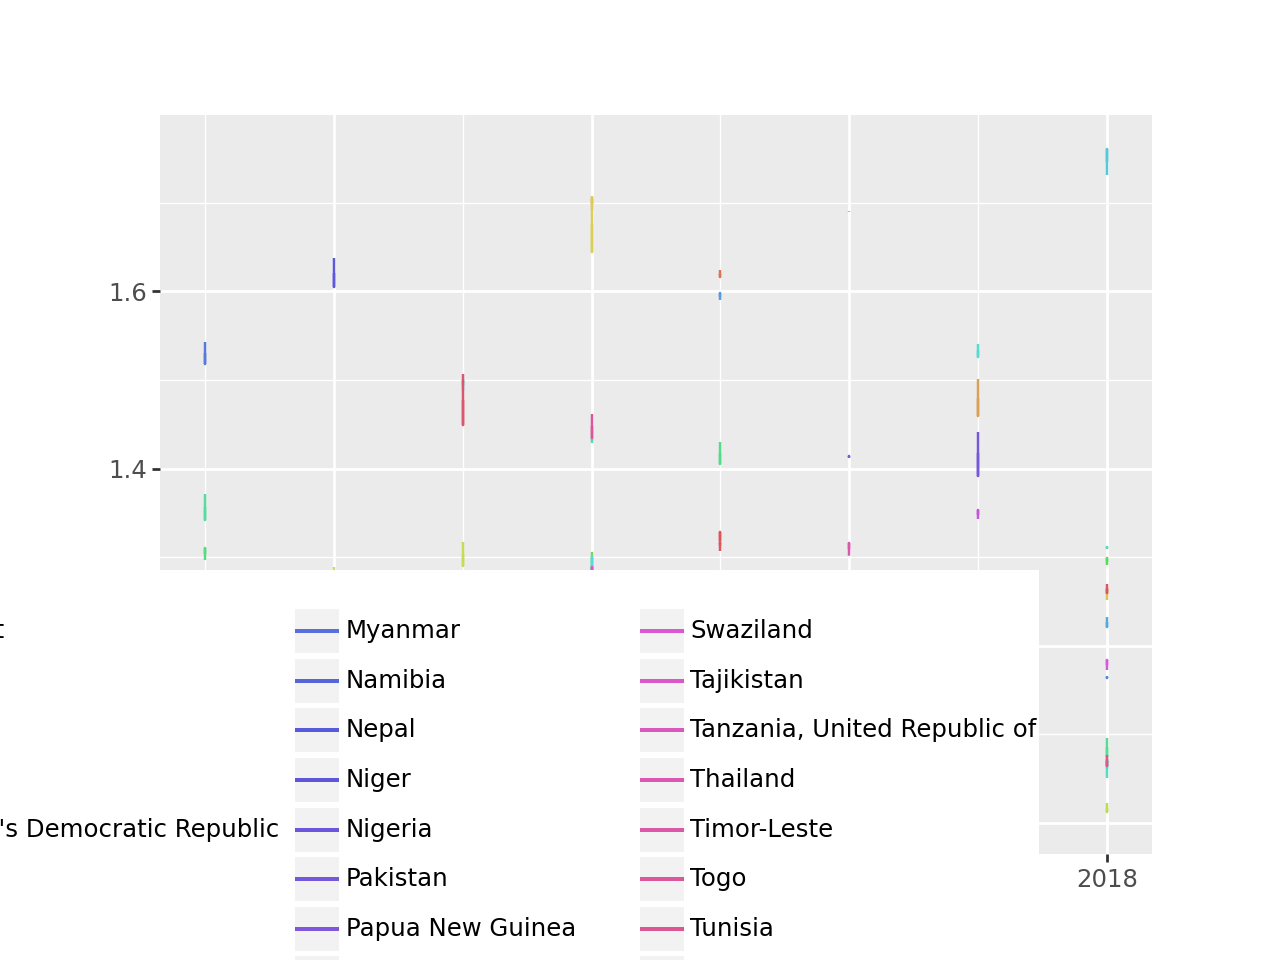

In [6]:
# Time Series Line Chart
(
    p9.ggplot(full_data, p9.aes(x='time_period', y='obs_value', color='country_x'))
    + p9.geom_line()
    + p9.ggtitle("Time Series of UNICEF Indicator Values by Country (Cleaned Data)")
)


**Time Series Line Chart**

A time-series chart generally represents the indicator values of each country over several years:

•Each line notes the trajectory of that country.

•Some countries exhibit continuous improvement, while others have volatility.

•It helps in differentiating consistence performers from the countries that are fluctuating and struggling.

•Countries that show sharp increases or decreases may well be experiencing monumental policy changes, economic incidents, or crises.



## Conclusion

The fully cleaned UNICEF data shows significant disparities in child welfare indicators across different countries and time periods. By filling missing values carefully, the analysis becomes even more reliable for policy recommendations.The set of visualizations thus provide a detailed and multifaceted picture of global child well-being as measured against UNICEF indicators. In this instance, the map of the world pinpoints geographical differences, while the bar chart refers to the top scoring countries. The attempt at establishing trends in indicator values along a time axis in a scatter plot appears to signify whether some global progress exists. Finally, the time series chart represents the dynamics in individual countries and indicates specific patterns of progress or disruption. The findings combined emphasize the need for sustained international action, data-led policymaking, and global collaboration towards an equitable agenda for child health, education, and overall development outcomes.
